<a href="https://colab.research.google.com/github/wdmarinh96/-challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd


In [ ]:
print(len(tienda1), len(tienda2), len(tienda3), len(tienda4))


2359 2359 2359 2358


In [ ]:
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)


In [ ]:
print(tienda1.head(1))
print(tienda2.head(1))
print(tienda3.head(1))
print(tienda4.head(1))


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   

  Fecha de Compra     Vendedor Lugar de Compra  Calificación  \
0      16/01/2021  Pedro Gomez          Bogotá             4   

       Método de pago  Cantidad de cuotas      lat       lon    tienda  
0  Tarjeta de crédito                   8  4.60971 -74.08175  tienda_1  
           Producto Categoría del Producto    Precio  Costo de envío  \
0  Silla de oficina                Muebles  283600.0         15300.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      04/08/2021  Izabela de León        Medellín             1   

  Método de pago  Cantidad de cuotas      lat       lon  
0          Nequi                   1  6.25184 -75.56359  
           Producto Categoría del Producto     Precio  Costo de envío  \
0  Secadora de ropa      Electrodomésticos  1285100.0         66600.0   

  Fecha de Compra       Vendedor 

In [ ]:
print("Columnas disponibles:", df.columns)

Columnas disponibles: Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [ ]:
df['facturacion'] = df['Precio'] * df['Cantidad de cuotas']
facturacion_total = df['facturacion'].sum()
print(f"\n1. Facturación total: {facturacion_total:,.2f}")


1. Facturación total: 13,102,551,000.00


# 2. Ventas por categoría

In [ ]:
ventas_categoria = df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)
print("\n2. Ventas por categoría:")
print(ventas_categoria)


2. Ventas por categoría:
Categoría del Producto
Muebles                    5511
Electrónicos               5229
Juguetes                   3606
Electrodomésticos          3434
Deportes y diversión       3175
Instrumentos musicales     2312
Libros                     2239
Artículos para el hogar    2114
Name: Cantidad de cuotas, dtype: int64


# 3. Calificación promedio de la tienda


In [62]:
import pandas as pd


In [63]:
tienda["tienda"] = "tienda_1"
tienda2["tienda"] = "tienda_2"
tienda3["tienda"] = "tienda_3"
tienda4["tienda"] = "tienda_4"

In [64]:
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [65]:
calificacion_por_tienda = df.groupby("tienda")["Calificación"].mean()
print("\n3. Calificación promedio por tienda:")
print(calificacion_por_tienda)


3. Calificación promedio por tienda:
tienda
tienda_1    3.976685
tienda_2    4.037304
tienda_3    4.048326
tienda_4    3.995759
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [77]:
#Producto más vendido para el total de las tiendas
ventas_producto = df.groupby("Producto")["Cantidad de cuotas"].sum()
producto_mas_vendido = ventas_producto.idxmax()
producto_menos_vendido = ventas_producto.idxmin()
print("\n4. Producto más vendido:", producto_mas_vendido)
print("   Producto menos vendido:", producto_menos_vendido)


4. Producto más vendido: Secadora de ropa
   Producto menos vendido: Smartwatch


In [78]:
#Producto más y menos vendido para cada tienda
for tienda_nombre in df["tienda"].unique():
  tienda_df = df[df["tienda"] == tienda_nombre]  # Filtrar por tienda
  ventas_producto = tienda_df.groupby("Producto")["Cantidad de cuotas"].sum()

  producto_mas_vendido = ventas_producto.idxmax()
  producto_menos_vendido = ventas_producto.idxmin()

  print(f"\nTienda: {tienda_nombre}")
  print(f"  Producto más vendido: {producto_mas_vendido}")
  print(f"  Producto menos vendido: {producto_menos_vendido}")


Tienda: tienda_1
  Producto más vendido: Secadora de ropa
  Producto menos vendido: Celular ABXY

Tienda: tienda_2
  Producto más vendido: Iniciando en programación
  Producto menos vendido: Mesa de comedor

Tienda: tienda_3
  Producto más vendido: Bicicleta
  Producto menos vendido: TV LED UHD 4K

Tienda: tienda_4
  Producto más vendido: Dashboards con Power BI
  Producto menos vendido: Armario


# 5. Envío promedio por tienda

In [67]:
envio_promedio = df.groupby("tienda")["Costo de envío"].mean()
print("\n5. Envío promedio por tienda:")
print(envio_promedio)


5. Envío promedio por tienda:
tienda
tienda_1    26018.609580
tienda_2    25216.235693
tienda_3    24805.680373
tienda_4    23459.457167
Name: Costo de envío, dtype: float64


In [69]:
df["Facturación"] = df["Precio"] * df["Cantidad de cuotas"]

**GRÁFICOS**

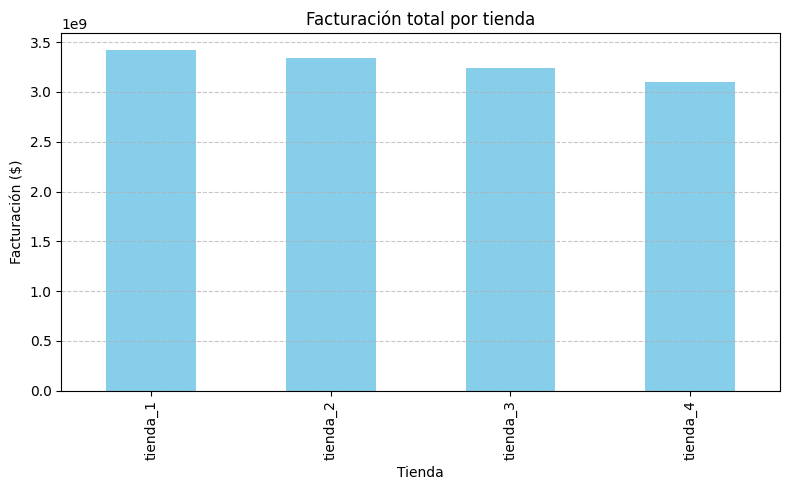

In [71]:
import matplotlib.pyplot as plt

# Facturación por tienda
facturacion_tienda = df.groupby("tienda")["Facturación"].sum()

plt.figure(figsize=(8,5))
facturacion_tienda.plot(kind="bar", color="skyblue")
plt.title("Facturación total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

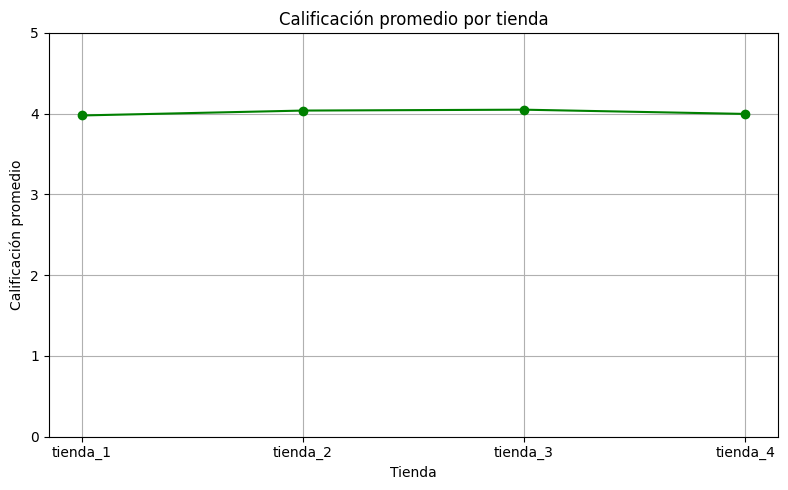

In [72]:
# Calificación promedio por tienda
calificacion_por_tienda = df.groupby("tienda")["Calificación"].mean()

plt.figure(figsize=(8,5))
plt.plot(calificacion_por_tienda.index, calificacion_por_tienda.values, marker="o", color="green")
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()

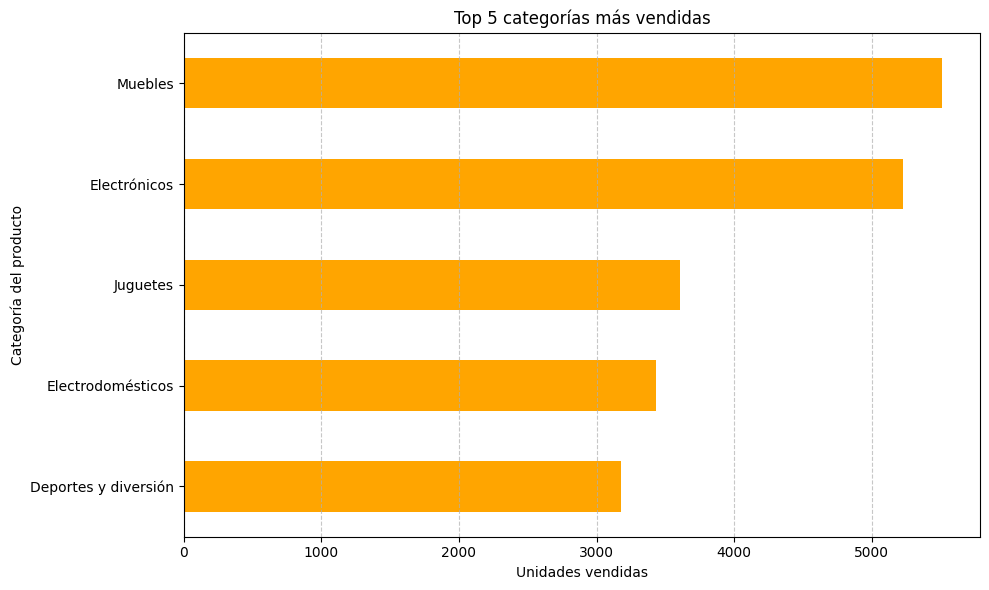

In [73]:
# Top 5 categorías más vendidas
ventas_categoria = df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=True).tail(5)

plt.figure(figsize=(10,6))
ventas_categoria.plot(kind="barh", color="orange")
plt.title("Top 5 categorías más vendidas")
plt.xlabel("Unidades vendidas")
plt.ylabel("Categoría del producto")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Recomendación para el Sr. João: ¿Dónde vender sus productos?**

Bueno, después de revisar los datos de las cuatro tiendas, creo que la mejor opción para el Sr. João sería la Tienda 1. Me baso en varias cosas:

Primero, la Tienda 1 es la que más plata mueve, o sea, tiene la facturación total más alta. Eso significa que hay más clientes comprando ahí, y eso es bueno para el Sr. João porque tendría más chances de vender sus productos.

Otro punto importante es que la Tienda 1 tiene buenas calificaciones, lo que significa que la gente está contenta con la tienda. Eso ayuda a generar confianza y a que más gente se anime a comprar, lo cual beneficia al Sr. João también.
Considero que la Tienda 1 es una buena opción para empezar, pero siempre es bueno investigar un poco más y ver todas las opciones antes de tomar una decisión final.

